In [1]:

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor


## Obtaining and exploring the data

In [2]:
df_raw = pd.read_csv('./data.csv')
df_raw.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [3]:
print("Shape ",df_raw.shape)
print(df_raw.isna().sum())
df_raw.info()

Shape data.csv, (170653, 19)
valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float

## Data Cleaning

In [ ]:
df = df_raw.copy()
df['artists'] = df['artists'].str.replace('[',"")
df['artists'] = df['artists'].str.replace(']','')
df['artists'] = df['artists'].str.replace("'",'')
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"Sergei Rachmaninoff, James Levine, Berliner Ph...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,Dennis Day,0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,Frank Parker,0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,Phil Regan,0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


VErifying that some columns should not have any 0 values on it.
See how to handle that

In [7]:
is_tempo = True
is_year=True
is_duration_ms=True


if (df['tempo']==0).any() :
    is_tempo=True
else:
    is_tempo=False

if (df['year']==0).any():
    is_year=True
else:
    is_year=False

if(df['duration_ms']==0).any():
    is_duration_ms=True
else:
    is_duration_ms=False
    

############ SHORTER METHOD

_cols=['tempo','year','duration_ms']
for c in _cols:
    _v=True
    if(df[c]==0).any():
        _v=True
    else:
        _v=False
    print(f"Is there any empty/zero value in {c}? {_v}")




Is there zero values in tempo? True
Is there zero values in year? False
Is there zero values in duration_ms? False
Is there any empty/zero value in tempo? True
Is there any empty/zero value in year? False
Is there any empty/zero value in duration_ms? False


In [8]:
_df=df[df['tempo']==0]
_df

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
508,0.0,1924,0.99600,Ignacio Corsini,0.0,133947,0.025800,0,2WTtJDfCUjAyCZHRSfCLDn,0.76800,5,0.0831,-24.894,1,La Mina del Ford - Remasterizado,0,1924-03-29,0.0,0.0
591,0.0,1924,0.99600,Francisco Canaro,0.0,170253,0.315000,0,5tQsQaMquCXBREb1FNymi7,0.95600,8,0.3750,-15.969,0,Oh Mujer Mujer - Remasterizado,0,1924-07-12,0.0,0.0
2578,0.0,1934,0.00244,The Moors,0.0,14629,0.801000,0,29IVdlO7CSlcoOIpOsamkO,0.00125,4,0.0503,-0.671,0,Santa Claus Is Coming To Town,0,1934,0.0,0.0
2764,0.0,1935,0.93600,Orquesta Francisco Canaro,0.0,211880,0.202000,0,1QXbWUSsLWPtHrbZ7H8o9i,0.01370,6,0.1200,-12.399,1,Tu Y Yo,4,1935-01-01,0.0,0.0
3042,0.0,1937,0.89000,Billie Holiday,0.0,159600,0.281000,0,09eDRV4nzC3eVX7tDEJUNb,0.00000,10,0.2470,-13.078,1,Back In Your Own Backyard - Take 1,17,1937,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169591,0.0,2015,0.46900,$uicideBoy$,0.0,153809,0.630000,1,00CutyaH2ljgLtM0nM5LLd,0.37500,2,0.1270,-6.707,1,Clouds As Witnesses,52,2015-03-03,0.0,0.0
169717,0.0,2016,0.12700,"Rain Sounds, Rain Sounds & White Noise, Relaxi...",0.0,93452,0.000062,0,6HMSnRW8Htfd3YxdNgUF73,0.99900,9,0.7180,-18.685,1,Pouring Rain,54,2016-03-01,0.0,0.0
169935,0.0,2017,0.42000,Granular,0.0,180656,0.001720,0,03sJaTenPLeRaVUISW6pI5,0.39900,4,0.1100,-27.848,0,Pink Noise - BP 240 hz,61,2017-11-24,0.0,0.0
169968,0.0,2017,0.96200,Fabricants,0.0,175680,0.000020,0,4UYLGTJRGCt4KzP9r9Y9bH,0.02800,11,0.1370,-52.220,0,Brain Relaxation,57,2017-01-18,0.0,0.0


☝🏼
On first sight, The songs without tempo are:
either too old that were not correctly registered,
OR white noise songs, which are same frequency along the song. hence, there is no tempo on it.

## Data Visualization

<AxesSubplot:>

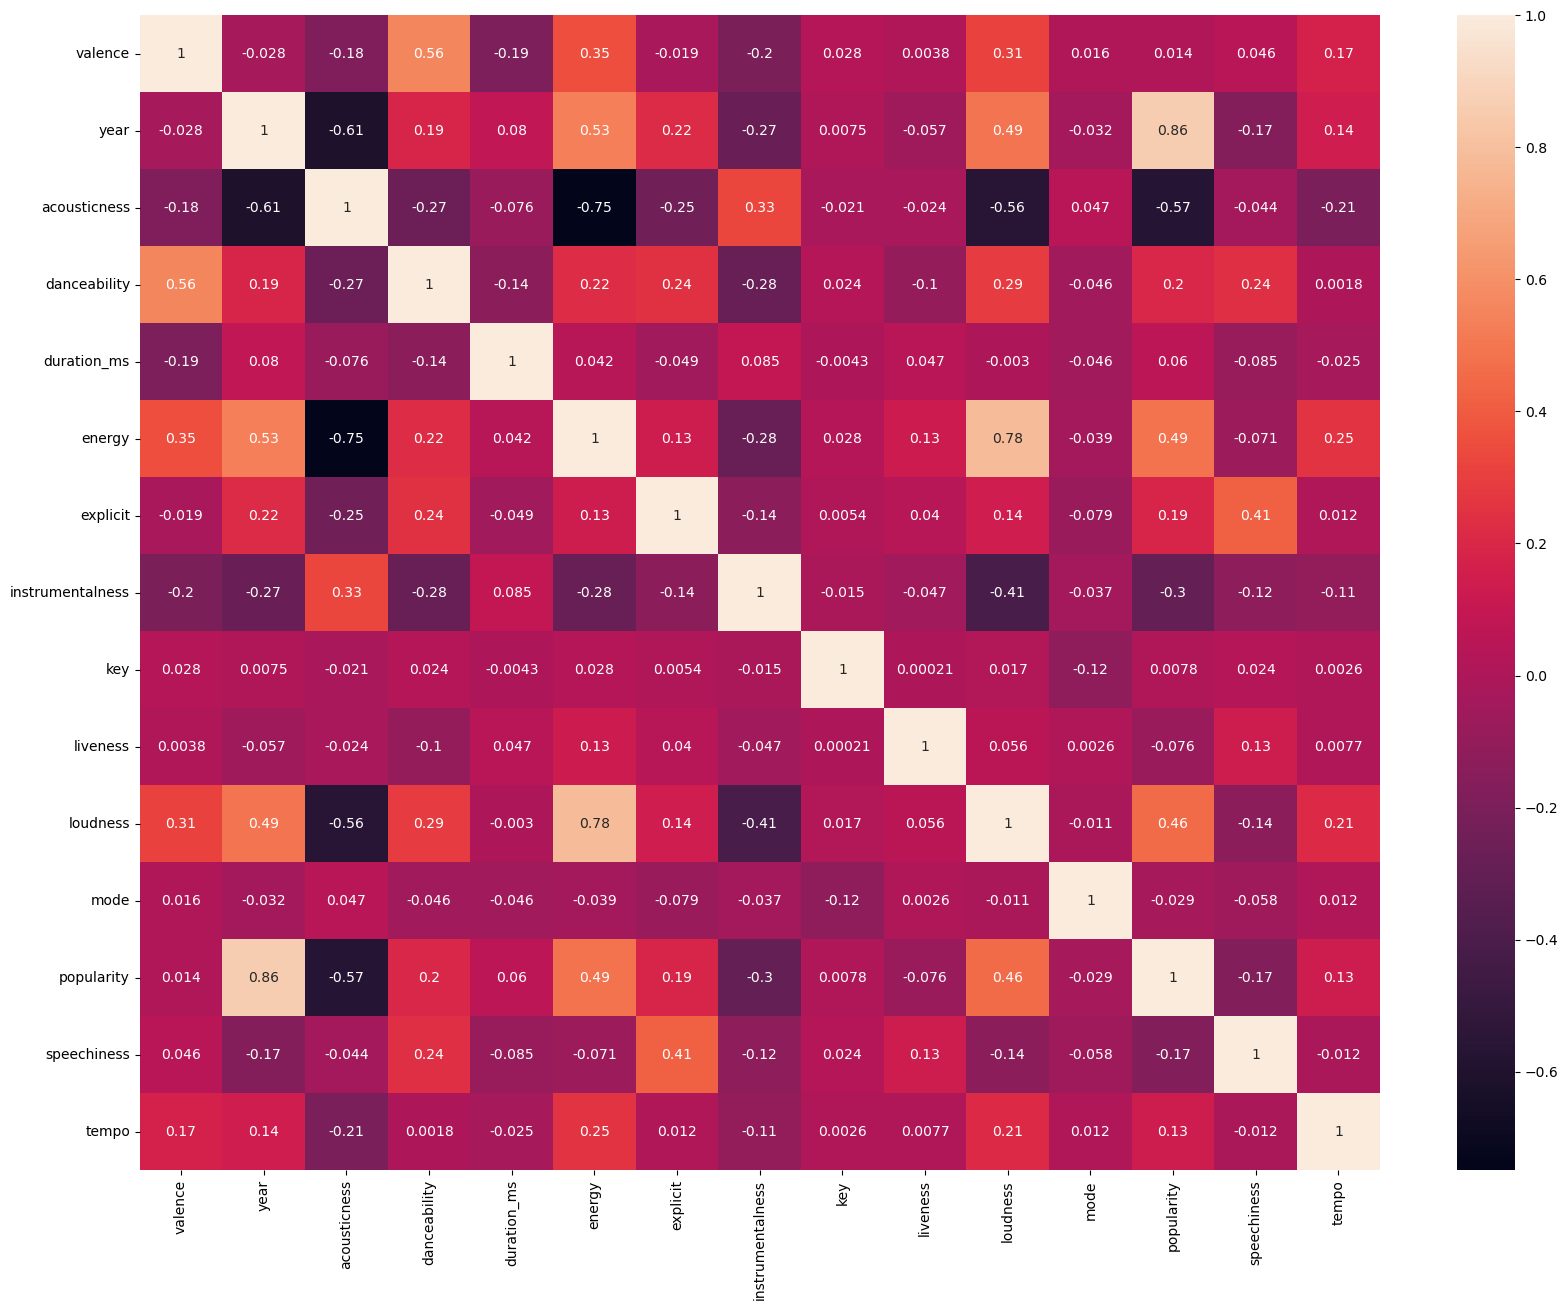

In [9]:
plt.figure(figsize=(20,15))
sns.heatmap(data=df.corr(), annot=True)

popularity and year  
energy and loudness  
valence and danceability  
≠  
accousticness≠popularity  
accousticness≠loudness  
accousticness≠energy  
accousticness≠year  
instrumentalness≠loudness



loudness and energy, has an interesting spike reaching 0 in loudness

## Data Wrangling

Tempo: Some songs have zero tempo, And that is due to one main reason: those songs are not song, but white noise. They do not contain any variance in their data. But there are some other songs that do not contain that info either, mostly songs from the 20s.

In [14]:
### FIxing 0 values on tempo
df.loc[df.tempo==0, 'tempo'] = is_tempo
is_tempo = True
mean_tempo = df['tempo'].mean()
df['tempo'] = df.tempo.mask(df.tempo == 0, mean_tempo)# where match, fill
print(mean_tempo)

#Verify again
if(df['tempo'] == 0).any():
    is_tempo=True
else:
    is_tempo=False
    print("zeros replaced eith mean:", mean_tempo)
print("empty/zero in tempo?",is_tempo)
print(df.describe())


116.86242757525564
zeros replaced eith mean: 116.86242757525564
empty/zero in tempo? False
             valence           year   acousticness   danceability  \
count  170653.000000  170653.000000  170653.000000  170653.000000   
mean        0.528587    1976.787241       0.502115       0.537396   
std         0.263171      25.917853       0.376032       0.176138   
min         0.000000    1921.000000       0.000000       0.000000   
25%         0.317000    1956.000000       0.102000       0.415000   
50%         0.540000    1977.000000       0.516000       0.548000   
75%         0.747000    1999.000000       0.893000       0.668000   
max         1.000000    2020.000000       0.996000       0.988000   

        duration_ms         energy       explicit  instrumentalness  \
count  1.706530e+05  170653.000000  170653.000000     170653.000000   
mean   2.309483e+05       0.482389       0.084575          0.167010   
std    1.261184e+05       0.267646       0.278249          0.313475   
min

### Prepare data to train

In [15]:
features=['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness',
          'mode', 'speechiness', 'tempo'] #all except, id, artis, release date
target='popularity'

_full_feats=features.copy()
_full_feats.append(target)
columns = list(df.columns)
print(_full_feats)
print(columns)

df2=df[_full_feats].copy()



['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'popularity']
['valence', 'year', 'acousticness', 'artists', 'danceability', 'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo']


In [16]:

X_train, X_test, y_train, y_test = train_test_split(df2.drop('popularity',axis=1), df2['popularity'], test_size=0.2, random_state=42)

#make sure popularity is not there, it is data from spotify
print(df2.columns)
if 'popularity' in df2.columns:
    del df2['popularity']
df2.shape


Index(['valence', 'year', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'speechiness', 'tempo', 'popularity'],
      dtype='object')


(170653, 14)

In [17]:
for x in [X_train, y_train, X_test, y_test]:
    print(x.shape)
#     print(x.describe)

(136522, 14)
(136522,)
(34131, 14)
(34131,)


## Finding Neighbors
Using KneighborRegressor  
>Using KNN to see what is the closest songs to each other instead of cosine similarity so i can get the proper metrics from it  

>  This will be our model. We will have 20 neighbours calculated (by default), our algorithm to search for neighbours just brute-force searches the data,  n_jobs tells the program how many parallel jobs to run while looking for neighbours, in this case it is using all processes. metric is what we will   use to find the distance between neighbours. This one is cosine, so it is like looking at the vector distance between neighbours.

In [18]:
knr = KNeighborsRegressor(n_neighbors=300, algorithm ='auto', n_jobs=-1, metric='euclidean')
knr.fit(X_train, y_train)
predict=knr.predict(X_test)

#### Mean Square error
# >how close the estimates are to the real values. A low value indicates a good fit for the data.

print("MSE:",(np.power(y_test-predict,1).mean()))

MSE: -0.056656900374049045


### Testing prediction
Testing the file, there is an issue with capitalize, or different case.

In [19]:
names = df.index[df['name']=='Umbrella'].tolist()
print("by name 'umbrella'",names,'\n')

for name in names[:2]:
    print('Song id ',name,':')
    print(df.loc[name])
    print('-=================================-')

by name 'umbrella' [17052, 17238, 72974] 

Song id  17052 :
valence                              0.575
year                                  2007
acousticness                       0.00864
artists                     Rihanna, JAY-Z
danceability                         0.583
duration_ms                         275987
energy                               0.829
explicit                                 0
id                  2yPoXCs7BSIUrucMdK5PzV
instrumentalness                       0.0
key                                      1
liveness                            0.0426
loudness                            -4.603
mode                                     1
name                              Umbrella
popularity                              65
release_date                    2007-01-01
speechiness                          0.134
tempo                              174.028
Name: 17052, dtype: object
-=================================-
Song id  17238 :
valence                              0.575


In [20]:
#make sure popularity is not there
print(df2.columns)
if 'popularity' in df2.columns:
    print("Deleted popularity")
    del df2['popularity']
df2.shape

Index(['valence', 'year', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'speechiness', 'tempo'],
      dtype='object')


(170653, 14)

In [21]:

distances, index = knr.kneighbors(df2.iloc[names[0],:].values.reshape(1,-1),n_neighbors=26)


In [22]:
songs=[]
dist=[]
playlist=[]
for i in range(0,len(distances.flatten())): #distances is a 1element list of lists, so lets flatten it
    if i !=0:
        songs.append(df.index[index.flatten()[i]])
        song_index = df.index[index.flatten()[i]]
        print("name",df.iloc[song_index]['name'])
        print("id",df.iloc[song_index]['id'])
        print("index",df.index[index.flatten()[i]])
        dist.append(distances.flatten()[i])
        playlist.append(df.iloc[song_index]['id'])
        
s=pd.Series(songs, name='song')
d=pd.Series(dist, name="distance")
recommend = pd.concat([s,d], axis=1)
recommend = recommend.sort_values('distance', ascending=False)

print(f"Recomendations for {df.index[songs[0]]}\n\n")
for i in range(0, recommend.shape[0]):
    print(f"\n>{i}: {recommend['song'].iloc[i]}, with distance of {recommend['distance'].iloc[i]}")
        

name Winter Lady
id 3YNKbymzBpPlqGTQnwtYWn
index 28082
name In The Arms Of Sleep - Remastered 2012
id 0DqjIXjwhDOKVl7ChheeIc
index 70227
name Pídeme
id 6VfdXxzdvhRU7SUJkkerac
index 121902
name Go West - 2003 Remaster
id 33gDIKlrUnY1dTWYsm5BFL
index 71761
name The Good Life
id 4MVvSNPOUd2z70vkkNCbLr
index 8301
name This Is Home
id 7s8VgA8OjvwBUuigKzEGBx
index 18636
name Alan's Psychedelic Breakfast
id 1oYeGnAbyODhUHO4jOMW9v
index 47282
name Doses & Mimosas
id 44CZRkOxv7UItaAUmh8PgN
index 18449
name You Gots To Chill
id 0f1yzIIGD8k32DNVeEn6jb
index 13343
name Piano Concerto No.20 in D minor, K.466: 2. Romance - Live At Severance Hall, Cleveland / 2010
id 5iNbFdlGQ7d1y2HfIfvdNP
index 90330
name Knowledge God
id 2q5rCHN0AciKiTZ864rNP4
index 87363
name Trying to Get to You
id 4zQLZPcTl8hJC5pJtooT3h
index 6891
name Piano Sonata No. 23 in F Minor, Op. 57 "Appassionata": I. Allegro assai
id 76sJBIQXb2nLmXYZKEsBt4
index 41977
name China Cat Sunflower - 2001 Remaster
id 4jWxUGQA1SNFO0WQXk8npk
in

## AUtomate prediction

In [24]:
import time

song=str(input("Enter the name of a song: "))
while(song != "-1" ):
    results=df.index[df['name'].str.lower()==song.lower()].tolist()
    if(results == None or results==[] or len(results)==0):
        
        print("there are no songs with that name, try again")
        song=str(input("Enter the name of a song (-1 to quit): "))
        continue
    distances, index = knr.kneighbors( 
        df2.iloc[results[0]].values.reshape(1,-1), 
        n_neighbors=100)
    songs=[]
    dist=[]
    playlist=[]
    for i in range(0,len(distances.flatten())):
        if i!=0:
            songs.append(df.index[index.flatten()[i]])
            song_index = df.index[index.flatten()[i]]
            dist.append(distances.flatten()[i])
            playlist.append(df.iloc[song_index]['id'])
    #     recommend=pd.DataFrame()
    #     recommend['song']=songs
    #     recommend['distance']=dist
    #     recommend = recommend.sort_values('distance',ascending=False)
   
    s=pd.Series(songs, name='song')
    d=pd.Series(dist, name="distance")
    recommend = pd.concat([s,d], axis=1)
    recommend = recommend.sort_values('distance', ascending=False)#False
    recommend_bottom = recommend.sort_values('distance', ascending=True)#False
#     print("Recommended Top", recommend[:10])
#     print("Recommended Bottom", recommend_bottom[:10])
    print("Recommendation for",song, "by", df['artists'].iloc[results[0]] ,results[0],'\n')
    for s in range(0,5):#recommend.shape[0]):
        _s=recommend['song'].iloc[s]
        print(f"{s} [index {_s}]: {df['name'].iloc[_s]} \n\tdistance:{recommend['distance'].iloc[s]} \n\tid:{df['id'].iloc[_s]}")
        print(f"\t https://open.spotify.com/track/{df['id'].iloc[_s]}")  #https://open.spotify.com/track/0PB0O24JqAuNdOAFVJljMS
        print(f"https://music.youtube.com/search?q={(df['name'].iloc[_s]).replace(' ','+')}+{(df['artists'].iloc[_s]).replace(' ','+')}")
        print("\n")
    print("\n\n==== top recommended=====\n")
    for s in range(0,5): #recommend_bottom.shape[0]):
        _s=recommend_bottom['song'].iloc[s]
        print(f"{s} [index {_s}]: {df['name'].iloc[_s]} \n\tdistance:{recommend_bottom['distance'].iloc[s]} \n\tid:{df['id'].iloc[_s]}")
        print(f"\t https://open.spotify.com/track/{df['id'].iloc[_s]}")  #https://open.spotify.com/track/0PB0O24JqAuNdOAFVJljMS
        print(f"https://music.youtube.com/search?q={(df['name'].iloc[_s]).replace(' ','+')}+{(df['artists'].iloc[_s]).replace(' ','+')}")
        print("\n")
    print("-----------------\n")
    time.sleep(2)
    song=str(input("Enter the name of a song (-1 to quit): "))

Enter the name of a song: Light my fire
Recommendation for Light my fire by The Doors 9014 

0 [index 72910]: It's So Hard To Say Goodbye To Yesterday 
	distance:1080.8531363513632 
	id:264JdkdtNRAGL4M4PnDYHC
	 https://open.spotify.com/track/264JdkdtNRAGL4M4PnDYHC
https://music.youtube.com/search?q=It's+So+Hard+To+Say+Goodbye+To+Yesterday+Boyz+II+Men


1 [index 53979]: Crystal Baller 
	distance:1067.1573415420178 
	id:2TTmk2xlPcdzQnrTHJQP8G
	 https://open.spotify.com/track/2TTmk2xlPcdzQnrTHJQP8G
https://music.youtube.com/search?q=Crystal+Baller+Third+Eye+Blind


2 [index 41860]: Chham Chham Ghanghor Ghataye 
	distance:1067.1376419556477 
	id:5NORVWGtkcQjMOh8sY0dpW
	 https://open.spotify.com/track/5NORVWGtkcQjMOh8sY0dpW
https://music.youtube.com/search?q=Chham+Chham+Ghanghor+Ghataye+Shamshad+Begum,+Motilal


3 [index 20143]: La entrerriana - Instrumental (Remasterizado) 
	distance:1067.13257328115 
	id:2cQCZxwZdmHL8xhffAzibi
	 https://open.spotify.com/track/2cQCZxwZdmHL8xhffAzibi
https: